# EDA

In [2]:
# imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading data

In [73]:
bank = pd.read_csv('data/bank.csv', sep = ';', header = 0) #smaller dataframe
bank_full = pd.read_csv('data/bank-full.csv', sep = ';', header = 0) #full dataframe

In [74]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank_full.shape

(45211, 17)

In [8]:
bank_full.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [21]:
print(bank_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


There isn't any Null values

In [22]:
bank_full = bank_full.drop_duplicates()

#### Job types

In [19]:
jobs = bank_full['job'].value_counts()
jobs

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Text(0.5, 1.0, 'Type of Job')

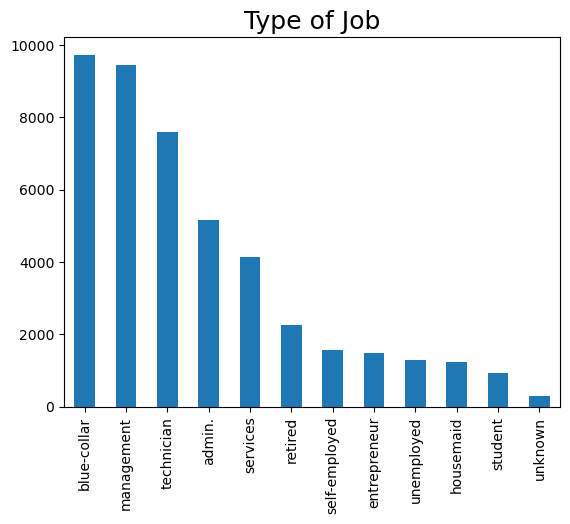

In [30]:
jobs.plot.bar()
plt.title('Type of Job', fontsize=18)

#### Marital

In [31]:
marital = bank_full['marital'].value_counts()
marital

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Text(0.5, 1.0, 'Marital Percentage')

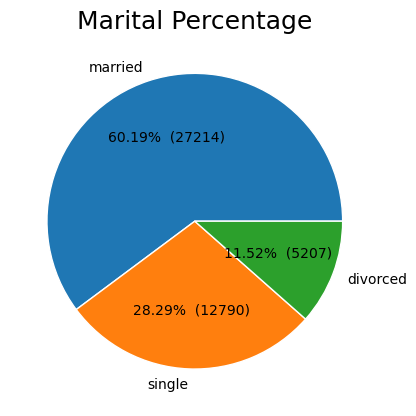

In [49]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(marital.values, labels = marital.index, autopct=make_autopct(marital.values),
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Marital Percentage', fontsize=18)

#### Education

In [33]:
education = bank_full['education'].value_counts()
education

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 1.0, 'Education Percentage')

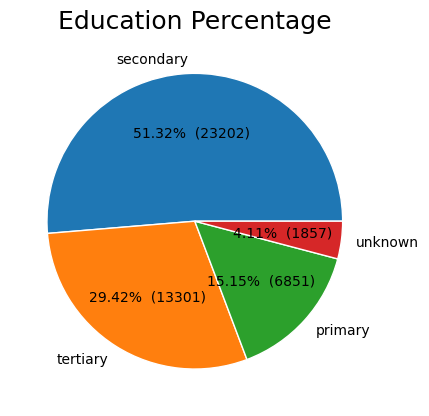

In [50]:
plt.pie(education.values, labels = education.index, autopct=make_autopct(education.values),
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Education Percentage', fontsize=18)

#### Default

In [35]:
default = bank_full['default'].value_counts()
default

no     44396
yes      815
Name: default, dtype: int64

Text(0.5, 1.0, 'Default Percentage')

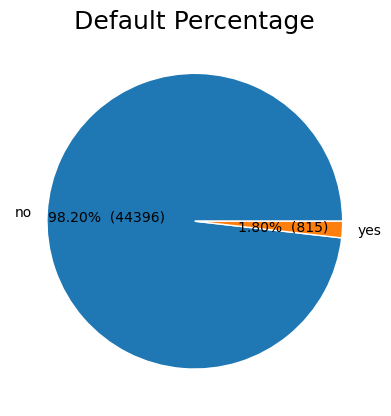

In [51]:
plt.pie(default.values, labels = default.index, autopct=make_autopct(default.values),
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Default Percentage', fontsize=18)

#### Age

Text(0.5, 1.0, 'Age Distribution')

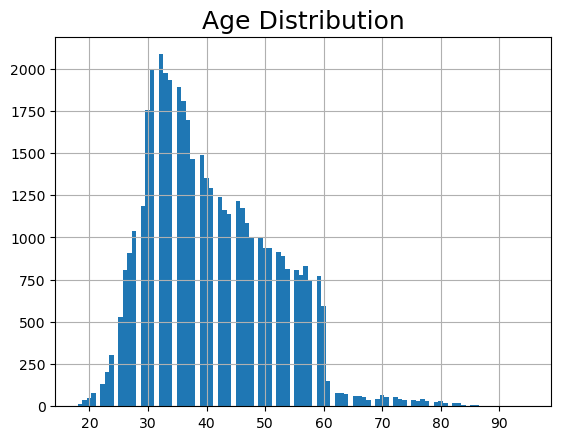

In [102]:
bank_full['age'].hist(bins= 100)
plt.title('Age Distribution', fontsize=18)

In [84]:
age_range = []
for i in bank_full['age']:
    if i < 20:
        age_range.append('age under 20 years old')
    elif i >= 20 and i < 30:
        age_range.append('age 20 to 29 years old')
    elif i >= 30 and i < 40:
        age_range.append('age 30 to 39 years old')
    elif i >= 40 and i < 50:
        age_range.append('age 40 to 49 years old')
    elif i >= 50 and i < 60:
        age_range.append('age 50 to 59 years old')
    elif i >= 60 and i < 70:
        age_range.append('age 60 to 69 years old')
    elif i >= 70 and i < 80:
        age_range.append('age 70 to 79 years old')
    elif i >= 80 and i < 90:
        age_range.append('age 80 to 89 years old')
    else:
        age_range.append('age 90 years old and older')
bank_full['age_range'] = age_range

In [89]:
age_range_count = bank_full['age_range'].value_counts()
age_range_count

age 30 to 39 years old        18089
age 40 to 49 years old        11655
age 50 to 59 years old         8410
age 20 to 29 years old         5226
age 60 to 69 years old         1230
age 70 to 79 years old          424
age 80 to 89 years old          121
age under 20 years old           47
age 90 years old and older        9
Name: age_range, dtype: int64

Text(0.5, 1.0, 'Age Range Distribution')

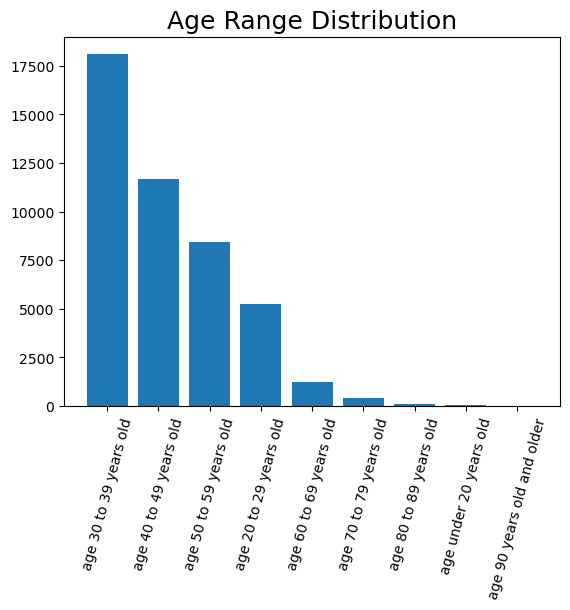

In [101]:
plt.bar(age_range_count.index, age_range_count.values)
plt.xticks(rotation = 75)
plt.title('Age Range Distribution', fontsize=18)

#### Loan

In [40]:
loan = bank_full['loan'].value_counts()
loan

no     37967
yes     7244
Name: loan, dtype: int64

Text(0.5, 1.0, 'Loan Percentage')

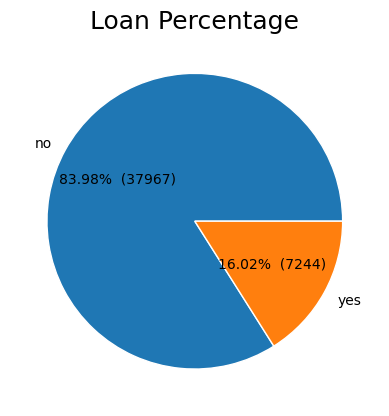

In [52]:
plt.pie(loan.values, labels = loan.index, autopct=make_autopct(loan.values),
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Loan Percentage', fontsize=18)

#### Housing

In [42]:
housing = bank_full['housing'].value_counts()
housing

no     37967
yes     7244
Name: loan, dtype: int64

Text(0.5, 1.0, 'Housing Percentage')

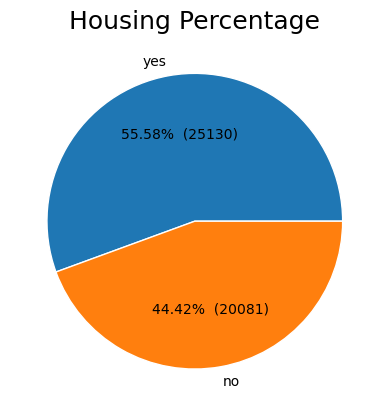

In [53]:
plt.pie(housing.values, labels = housing.index, autopct=make_autopct(housing.values),
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Housing Percentage', fontsize=18)

#### Contact

In [44]:
contact = bank_full['contact'].value_counts()
contact

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0.5, 1.0, 'Contact Percentage')

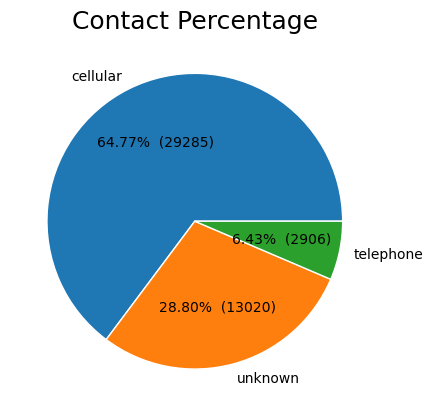

In [54]:
plt.pie(contact.values, labels = contact.index, autopct=make_autopct(contact.values),
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Contact Percentage', fontsize=18)

#### Day of the week

In [97]:
day = bank_full['day'].value_counts()
day

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

Text(0.5, 1.0, 'Day of the Month Data Distribution')

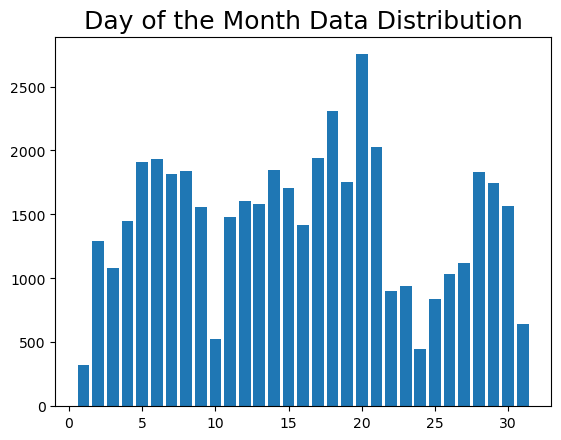

In [100]:
plt.bar(day.index, day.values)
plt.title('Day of the Month Data Distribution', fontsize=18)

#### Month

In [60]:
month = bank_full['month'].value_counts()
month

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Text(0.5, 1.0, 'Month Data Distribution')

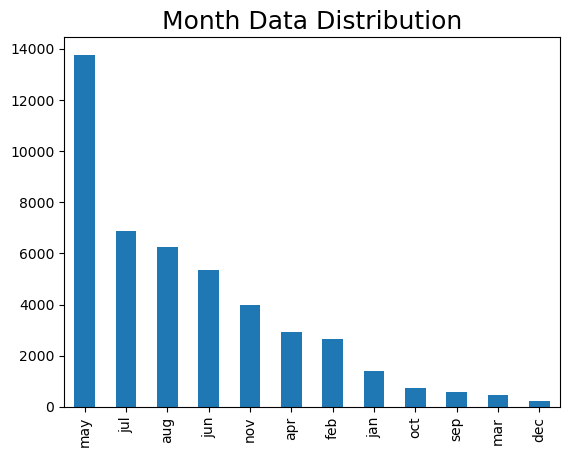

In [61]:
month.plot.bar()
plt.title('Month Data Distribution', fontsize=18)

#### pdays

Text(0.5, 1.0, 'Pdays Data Distribution')

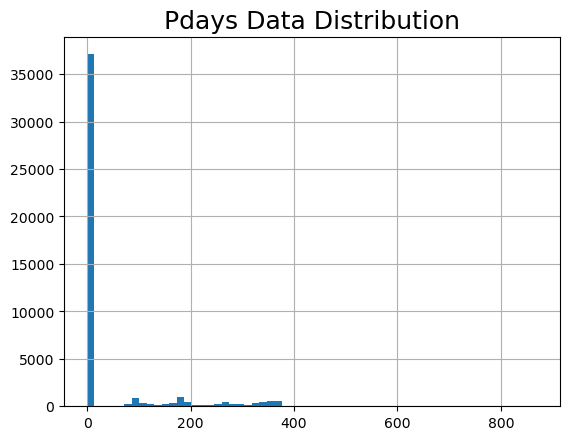

In [103]:
bank_full['pdays'].hist(bins = 60)
plt.title('Pdays Data Distribution', fontsize=18)

Text(0.5, 1.0, 'Pdays > 0 Data Distribution')

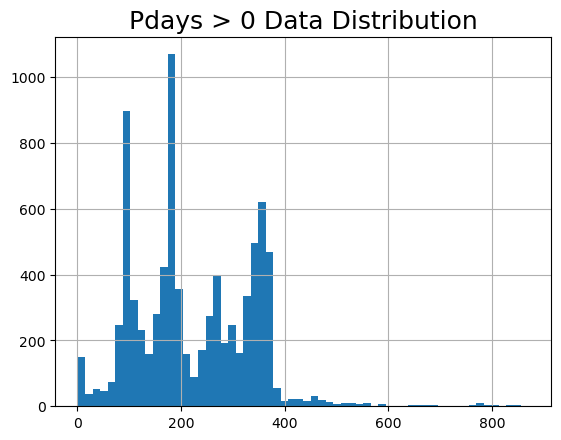

In [104]:
bank_full[bank_full['pdays'] > 0]['pdays'].hist(bins = 60)
plt.title('Pdays > 0 Data Distribution', fontsize=18)

#### Previous Outcome

In [95]:
poutcome = bank_full['poutcome'].value_counts()
poutcome

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Pervious Outcome Percentage')

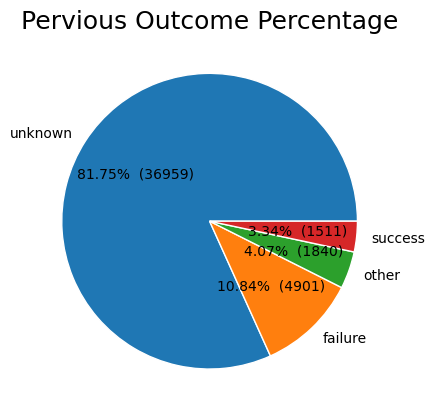

In [105]:
plt.pie(poutcome.values, labels = poutcome.index, autopct=make_autopct(contact.values),
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Pervious Outcome Percentage', fontsize=18)

#### Outcome

In [67]:
y = bank_full['y'].value_counts()
y

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Outcome Percentage')

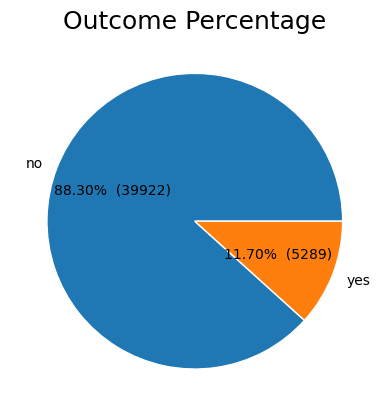

In [106]:
plt.pie(y.values, labels = y.index, autopct=make_autopct(contact.values),
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Outcome Percentage', fontsize=18)

#### Subscribed vs not Subscribed

Text(0.5, 1.0, 'Client that will subscrible to a term Deposit')

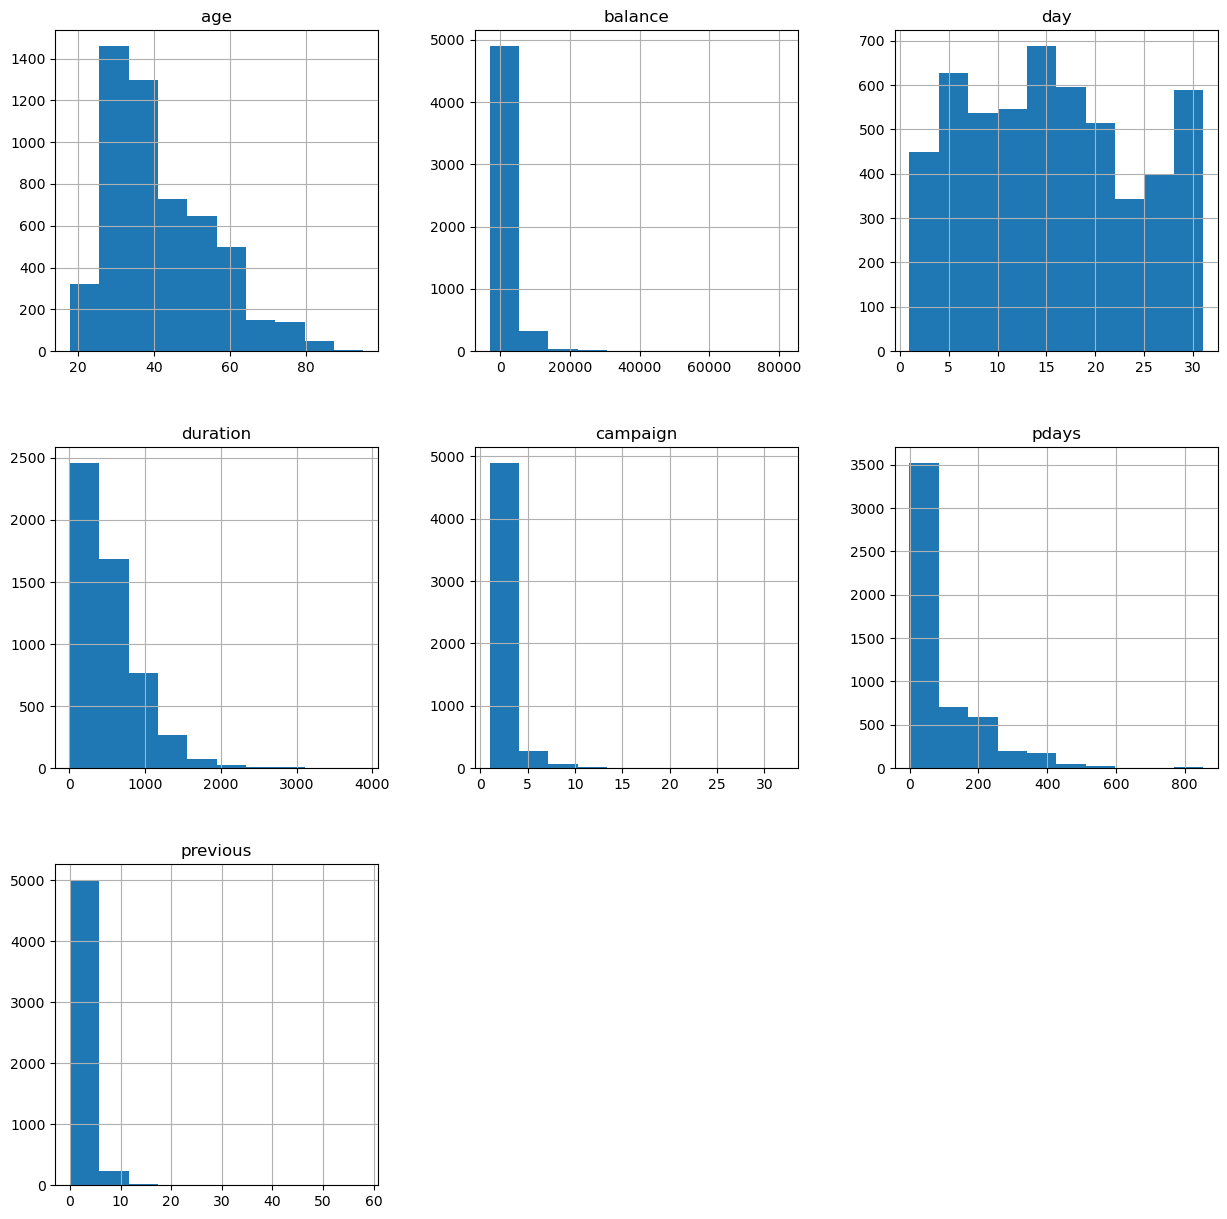

In [94]:
bank_full[bank_full['y'] == 'yes'].hist(figsize=(15, 15))
plt.title('Client that will subscrible to a term Deposit', fontsize=18)

Text(0.5, 1.0, 'Client that will not subscrible to a term Deposit')

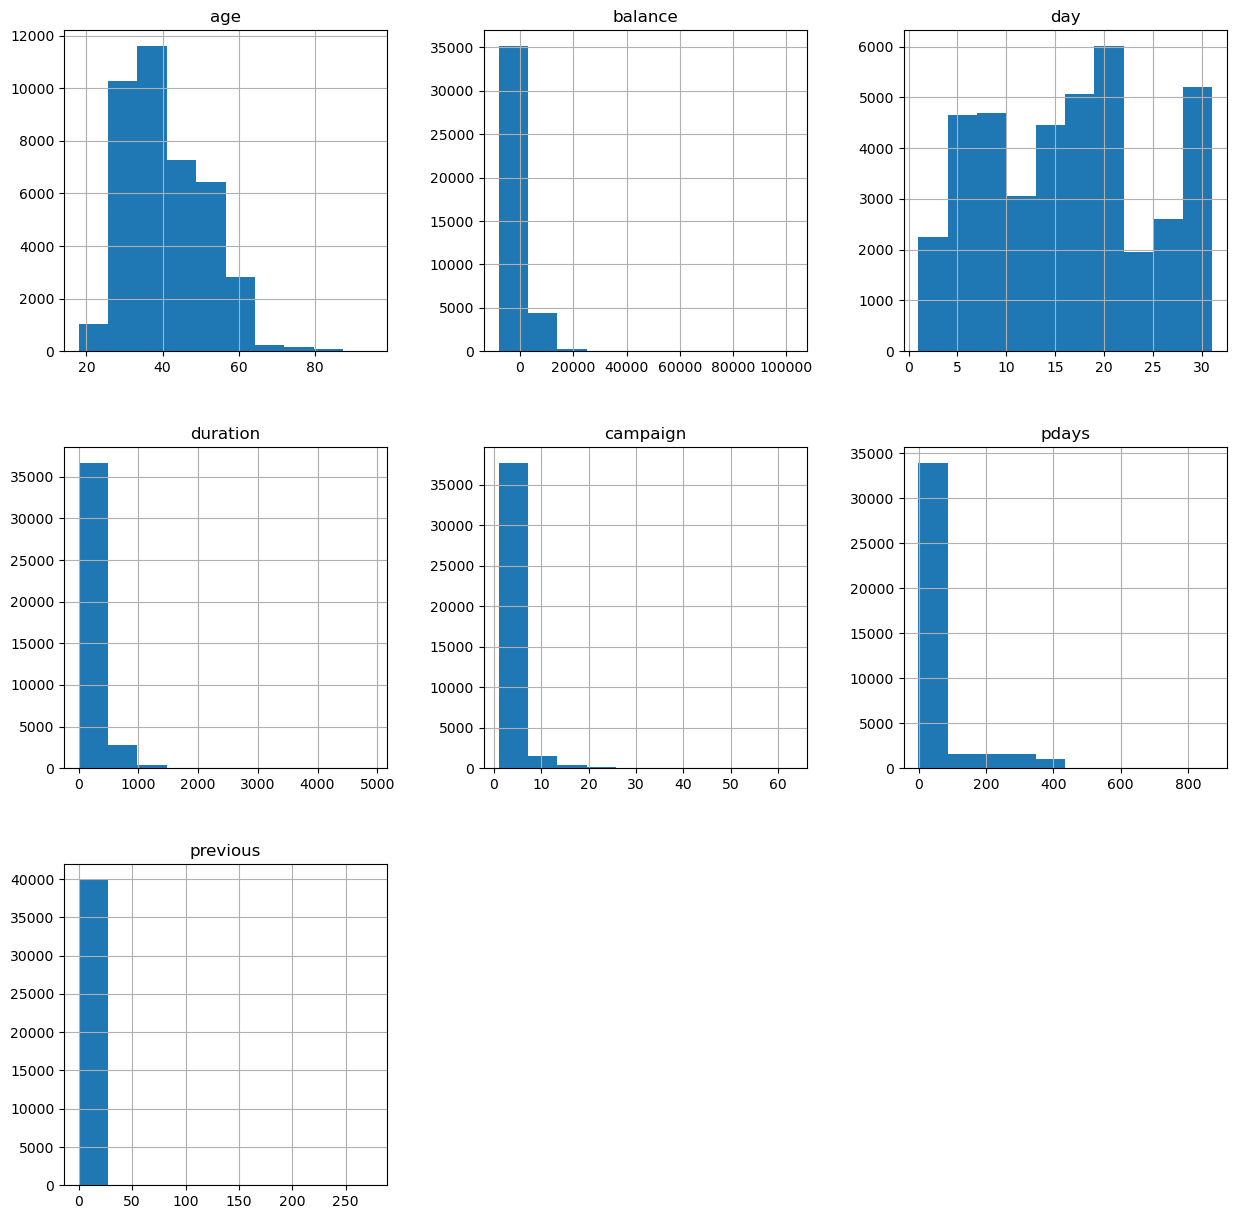

In [78]:
bank_full[bank_full['y'] == 'no'].hist(figsize=(15, 15))
plt.title('Client that will not subscrible to a term Deposit', fontsize=18)